In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/datascience
%pwd
%ls

/content/drive/My Drive/datascience
 amazon_com-product_reviews__20200101_20200331_sample.csv
 Amazon-Products.csv
'car data.csv'
 data.csv
 diabetes.csv
 income.csv
 insurance.csv
 mail_data.csv
 Mall_Customers.csv
 nba.csv
'Sample - Superstore.xls'
 sonar.csv
 spam_ham_dataset.csv
 statsfinal.csv
 tel_churn.csv
 titanic.csv
 USA_cars_datasets.csv
'WA_Fn-UseC_-Telco-Customer-Churn (1).csv'
 winequality-red.csv


In [6]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [9]:
#values of columns like 'glucose', 'blood pressure' cannot be accepted as zeros because it will affect the outcome, we can replace such values with the mean of the respective column
zero_not_accepted = ['Glucose', 'BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accepted:
  df[column] = df[column].replace(0, np.NaN) #replacing 0 with null
  mean = int(df[column].mean(skipna=True)) #figuring out the mean of column
  df[column] = df[column].replace(np.NaN, mean) #replacing null value witht he mean

In [10]:
df['Glucose']

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [11]:
#before proceeding further let's split the data into training and testing datsets
#split the dataset
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [13]:
#Feature scaling
#Any algorithm that computes distance or assumes normality, scale your features!
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [14]:
'''
Feature Scaling:
 1.Normalization: helps to scale the feature from 0 to 1
 2.Standardization: helps to scale the feature based on standard normal distribution where mean is 0 and satandard devaiation is 1

 '''

'\nFeature Scaling:\n 1.Normalization: helps to scale the feature from 0 to 1\n 2.Standardization: helps to scale the feature based on standard normal distribution where mean is 0 and satandard devaiation is 1\n\n '

In [ ]:
'''

1.Normalization(min-max normalization):

     In this approach we scale the values of the features between 0 to 1.

           Xnorm = (X - Xmin)/(Xmax - Xmin)

2.Standardization(Z-Score Normalization):

    Here all the features will be transformed in such a way that it will have the properties of a standard normal distribution
    with mean = 0 and standard_deviation = 1

            z = (x-mean)/standard_deviation


->The problems which we use the euclid distance, gradiant diatance we use scaling

'''

In [16]:
#N_neighbours here is 'k', p is the power parameter to define the metric used. which is euclidean in our case

#define the model
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean' )
classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [17]:
import math
math.sqrt(len(Y_test))

12.409673645990857

In [18]:
#evaluate model using confusion matrix
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
#evaluate model using confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[95 12]
 [18 29]]


In [20]:
print(f1_score(Y_test, y_pred))

0.6590909090909092


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier

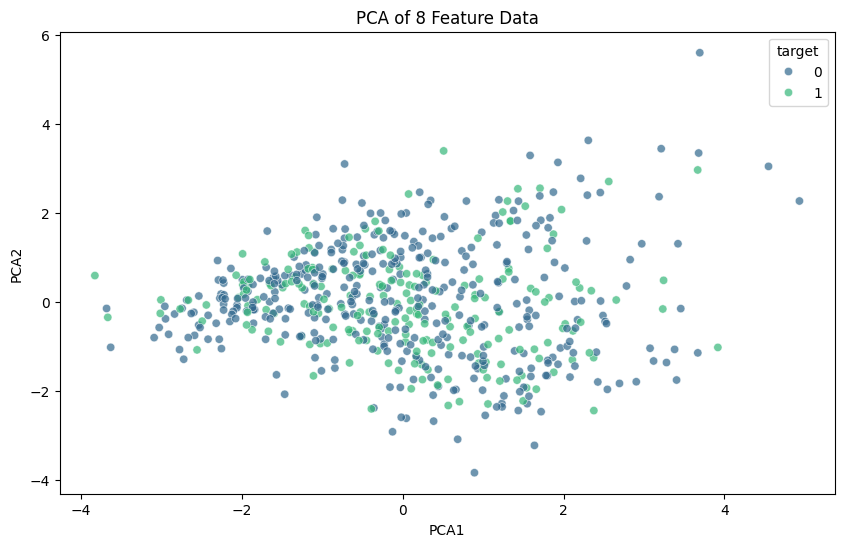

In [27]:

# Step 3: Visualize the data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='target', palette='viridis', alpha=0.7)
plt.title('PCA of 8 Feature Data')
plt.show()



In [33]:
#note: we need to scale the features before using principal component analysis(PCA)